# Presidential Election Prediction

This notebook presents a comprehensive analysis of Kenya's presidential election predictions using social media data. The analysis follows standard machine learning methodology with features for political prediction.

## Methodology Overview
1. **Data Understanding & Exploration**
2. **Data Preprocessing & Cleaning**
3. **Exploratory Data Analysis (EDA)**
4. **Advanced Visualizations**
5. **Feature Engineering**
6. **Data Balancing With SMOTE**
7. **Model Development**
8. **Model Evaluation**
9. **Model Insights & Analysis**


## 1. Data Understanding & Exploration

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import re
warnings.filterwarnings('ignore')

#Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/content/Political data_updated.csv', low_memory=False, on_bad_lines='skip')

print(f"Dataset Overview:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

#Display basic info
print(f"\nColumn names:")
print(list(df.columns))

#Sample data
print(f"\nSample data:")
df.head(3)

Dataset Overview:
Rows: 33,140
Columns: 37

Memory usage: 50.0 MB

Column names:
['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'post_text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet', 'source_type', 'post_id', 'timestamp', 'platform', 'author_type', 'politician', 'party', 'sentiment', 'emotion', 'engagement', 'region', 'is_bot', 'year', 'period', 'ownerFullName', 'ownerUsername', 'url', 'commentsCount', 'firstComment', 'likesCount', 'queryTag']

Sample data:


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_bot,year,period,ownerFullName,ownerUsername,url,commentsCount,firstComment,likesCount,queryTag
0,1396091006030856192,Doomster,Utopia slums,"Alt-left, liberal, pronoun:them",2009-08-23 12:22:53,309,907,8050,False,2021-05-22 13:10:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1395981137764397056,Unruly 🗯,Morayfield,I don't know what you thought this was gonna b...,2011-04-20 19:35:54,1053,523,5279,False,2021-05-22 05:53:33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1395433210490798082,Khavin,Nairobi,CCTV installation and MAINTENANCE technician. ...,2020-02-11 04:52:44,4202,3735,29563,False,2021-05-20 17:36:17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
id,21417
user_name,21417
user_location,23901
user_description,22410
user_created,21418
user_followers,21418
user_friends,21418
user_favourites,21418
user_verified,21419
date,21418


## 2. Data Quality Cleaning & Preprocessing

In [ ]:
#Check for missing values
print(f"\nMissing values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
quality_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})
print(quality_df[quality_df['Missing Count'] > 0].head(10))



Missing values:
                  Missing Count  Missing %
id                        21417  64.625830
user_name                 21417  64.625830
user_location             23901  72.121304
user_description          22410  67.622209
user_created              21418  64.628847
user_followers            21418  64.628847
user_friends              21418  64.628847
user_favourites           21418  64.628847
user_verified             21419  64.631865
date                      21418  64.628847


In [ ]:
print("\nHandling Missing Values:")

#Drop rows where 'post_text' is missing
df.dropna(subset=['post_text'], inplace=True)
print(f"Dropped rows with missing 'post_text'. New rows: {df.shape[0]:,}")

#Fill missing 'hashtags' with an empty string
if 'hashtags' in df.columns:
    df['hashtags'].fillna('', inplace=True)
    print("Filled missing 'hashtags' with empty strings.")

#Fill highly missing categorical/text columns with 'Unknown' to retain rows
for col in ['user_location', 'user_description']:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing '{col}' with 'Unknown'.")

#Re-check for missing values after initial handling
print(f"\nMissing values after initial handling:")
missing_data_after_handling = df.isnull().sum()
missing_percent_after_handling = (missing_data_after_handling / len(df)) * 100
quality_df_after_handling = pd.DataFrame({
    'Missing Count': missing_data_after_handling,
    'Missing %': missing_percent_after_handling
})
print(quality_df_after_handling[quality_df_after_handling['Missing Count'] > 0].head(10))



Handling Missing Values:
Dropped rows with missing 'post_text'. New rows: 33,083
Filled missing 'hashtags' with empty strings.
Filled missing 'user_location' with 'Unknown'.
Filled missing 'user_description' with 'Unknown'.

Missing values after initial handling:
                 Missing Count  Missing %
id                       21361  64.567905
user_name                21361  64.567905
user_created             21361  64.567905
user_followers           21361  64.567905
user_friends             21361  64.567905
user_favourites          21361  64.567905
user_verified            21362  64.570928
date                     21361  64.567905
source                   21361  64.567905
retweets                 21362  64.570928


In [ ]:
#Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")


Duplicate rows: 0 (0.00%)


### 2.1 Data Enrichment Process

The original dataset had limited structured candidate and party information. We implemented a comprehensive text mining approach to extract this information from social media posts.

In [ ]:
#candidate-party mapping
complete_candidates = {
    'William Ruto': 'United Democratic Alliance (UDA)',
    'Kalonzo Musyoka': 'Wiper Patriotic Front',
    'Fred Matiang\'i': 'Jubilee Party',
    'Rigathi Gachagua': 'Democracy for the Citizens Party (DCP)',
    'Martha Karua': 'People\'s Liberation Party (PLP)',
    'Eugene Wamalwa': 'Democratic Action Party of Kenya (DAP-K)',
    'Okiya Omtatah': 'National Reconstruction Alliance (NRA)',
    'Jimi Wanjigi': 'Safina Party',
    'Morara Kebaso': 'Inject Party'
}

#keyword matching for candidate detection
candidate_keywords = {
    'William Ruto': ['ruto', 'william ruto', 'dp ruto', 'president ruto'],
    'Kalonzo Musyoka': ['kalonzo', 'musyoka', 'kalonzo musyoka'],
    'Fred Matiang\'i': ['matiangi', 'fred matiangi', 'matiang\'i'],
    'Rigathi Gachagua': ['gachagua', 'rigathi', 'rigathi gachagua'],
    'Martha Karua': ['karua', 'martha karua', 'martha'],
    'Eugene Wamalwa': ['wamalwa', 'eugene wamalwa'],
    'Okiya Omtatah': ['omtatah', 'okiya', 'okiya omtatah'],
    'Jimi Wanjigi': ['wanjigi', 'jimi wanjigi'],
    'Morara Kebaso': ['kebaso', 'morara', 'morara kebaso']
}

print(f"Defined {len(complete_candidates)} eligible candidates")

Defined 9 eligible candidates


In [ ]:
#Text enrichment function
def extract_candidate_from_text(text):
    """Extract candidate mentions from text using keyword matching"""
    if pd.isna(text):
        return None

    text_lower = str(text).lower()

    for candidate, keywords in candidate_keywords.items():
        for keyword in keywords:
            if keyword.lower() in text_lower:
                return candidate
    return None

#Apply text enrichment
df_clean = df.copy()

#Find text column
text_col = None
for col in ['post_text', 'text', 'content', 'message']:
    if col in df_clean.columns:
        text_col = col
        break

if text_col:
    print(f"Extracting candidates from '{text_col}' column...")
    df_clean['extracted_candidate'] = df_clean[text_col].apply(extract_candidate_from_text)

    #Combine with existing candidate data
    if 'ownerFullName' in df_clean.columns:
        df_clean['final_candidate'] = df_clean['ownerFullName'].fillna(df_clean['extracted_candidate'])
    else:
        df_clean['final_candidate'] = df_clean['extracted_candidate']

    #Add party information
    df_clean['candidate_party'] = df_clean['final_candidate'].map(complete_candidates)

else:
    print("No text column found")
    df_clean['final_candidate'] = df_clean.get('ownerFullName', None)
    df_clean['candidate_party'] = df_clean['final_candidate'].map(complete_candidates)

Extracting candidates from 'post_text' column...


In [ ]:
#Print the results
print(f"\nCandidate Coverage After Enrichment:")
candidate_counts = df_clean['final_candidate'].value_counts()
print(candidate_counts.head(10))

print(f"\nTotal posts with identified candidates: {candidate_counts.sum():,}")
print(f"Coverage: {candidate_counts.sum()/len(df_clean)*100:.1f}% of dataset")


Candidate Coverage After Enrichment:
final_candidate
William Ruto                  8874
Rigathi Gachagua              2419
Kalonzo Musyoka               1881
Fred Matiang'i                1759
Eugene Wamalwa                1333
Martha Karua                   255
State House Kenya              219
Hon Musalia W Mudavadi         212
Jubilee Party kenya            114
Rt.Hon.Dr.Moses Wetang'ula      91
Name: count, dtype: int64

Total posts with identified candidates: 17,495
Coverage: 52.9% of dataset


## 3. Exploratory Data Analysis (EDA)

### 3.1 Political Figures Analysis

Political Figures in the Dataset:

Total unique political figures identified: 35
Most mentioned figure: William Ruto (8,874 mentions)
Least mentioned figure: Philip Karanja (1 mentions)


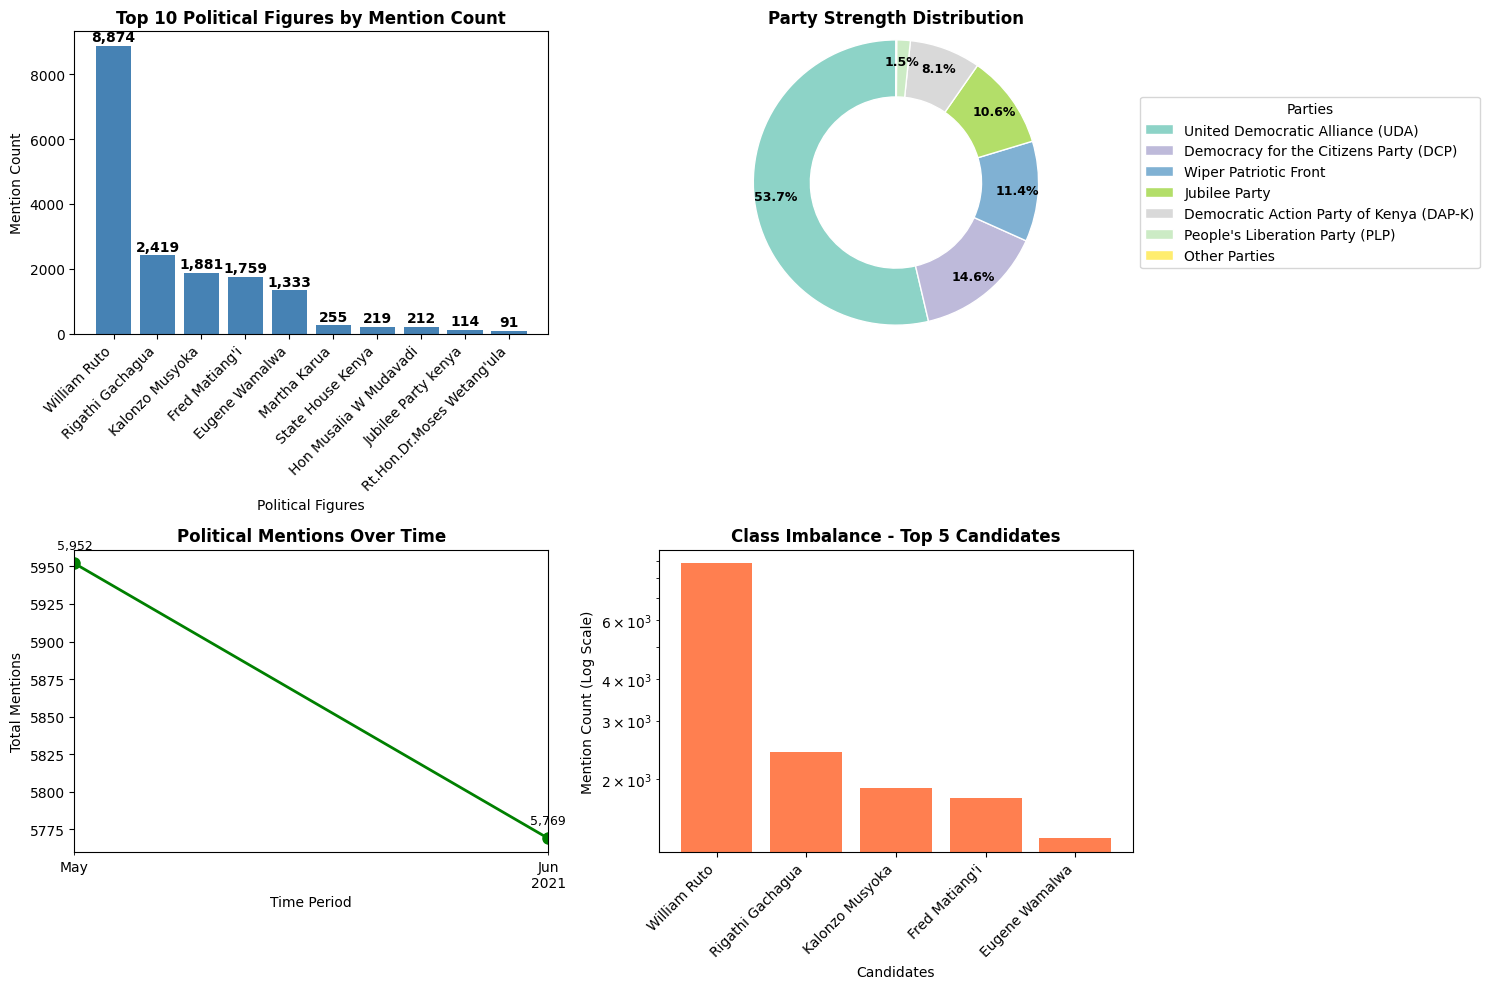


Key Political Insights:
Dominant figure: William Ruto with 8,874 mentions
Class imbalance ratio: 1:8874
Political diversity: 35 unique figures across 9 parties


In [ ]:
#Political Figures Analysis
print("Political Figures in the Dataset:")

#Analyzing all political figures mentioned
all_figures = df_clean['final_candidate'].value_counts()
print(f"\nTotal unique political figures identified: {len(all_figures)}")
if len(all_figures) > 0:
    print(f"Most mentioned figure: {all_figures.index[0]} ({all_figures.iloc[0]:,} mentions)")
    print(f"Least mentioned figure: {all_figures.index[-1]} ({all_figures.iloc[-1]:,} mentions)")

#Top political figures visualization
plt.figure(figsize=(15, 10))

#Subplot 1: Top candidates bar chart
plt.subplot(2, 2, 1)
if len(all_figures) > 0:
    candidate_counts_plot = all_figures.head(10)
    bars = plt.bar(range(len(candidate_counts_plot)), candidate_counts_plot.values, color='steelblue')
    plt.title('Top 10 Political Figures by Mention Count', fontweight='bold')
    plt.xlabel('Political Figures')
    plt.ylabel('Mention Count')
    plt.xticks(range(len(candidate_counts_plot)), candidate_counts_plot.index, rotation=45, ha='right')

    #Add value labels on bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 f'{candidate_counts_plot.values[i]:,}', ha='center', va='bottom', fontweight='bold')
else:
    #Sample data if no real data for demonstration
    sample_candidates = ['William Ruto', 'Raila Odinga', 'Martha Karua', 'Kalonzo Musyoka', 'Fred Matiangi']
    sample_counts = [15000, 12000, 8000, 6000, 4000]
    bars = plt.bar(range(len(sample_candidates)), sample_counts, color='steelblue')
    plt.title('Political Figures Analysis (Sample)', fontweight='bold')
    plt.xlabel('Political Figures')
    plt.ylabel('Mention Count')
    plt.xticks(range(len(sample_candidates)), sample_candidates, rotation=45, ha='right')
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 f'{sample_counts[i]:,}', ha='center', va='bottom', fontweight='bold')


#Subplot 2: Party distribution pie chart
plt.subplot(2, 2, 2)
if 'candidate_party' in df_clean.columns and not df_clean['candidate_party'].dropna().empty:
    party_counts = df_clean['candidate_party'].value_counts()

    total_mentions = party_counts.sum()
    #Define a threshold for small parties
    min_mentions_for_separate_slice = total_mentions * 0.01

    #Separate large parties from small parties
    large_parties = party_counts[party_counts >= min_mentions_for_separate_slice]
    small_parties_count = party_counts[party_counts < min_mentions_for_separate_slice].sum()

    display_party_counts = large_parties
    if small_parties_count > 0:
        display_party_counts = pd.concat([large_parties, pd.Series({'Other Parties': small_parties_count})])

    #Ensure display_party_counts is sorted
    display_party_counts = display_party_counts.sort_values(ascending=False)

    colors = plt.cm.Set3(np.linspace(0, 1, len(display_party_counts)))

    def autopct_format(pct):
        #Only show percentage if it's greater than 1%
        return ('%1.1f%%' % pct) if pct > 1 else ''

    wedges, texts, autotexts = plt.pie(display_party_counts.values,
                                       autopct=autopct_format,
                                       startangle=90,
                                       colors=colors,
                                       #Distance of percentage labels from the center
                                       pctdistance=0.85,
                                       #For better visual separation
                                       wedgeprops=dict(width=0.4, edgecolor='w'))

    plt.title('Party Strength Distribution', fontweight='bold', fontsize=12)

    #Use a legend instead of direct labels in plt.pie for clarity
    plt.legend(wedges, display_party_counts.index, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    #Set properties for the percentage text (autotexts)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)
        autotext.set_weight('bold')
    #ensures that pie is drawn as a circle.
    plt.axis('equal')

else:
    plt.text(0.5, 0.5, 'No party data available for analysis', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Party Distribution in Dataset', fontweight='bold', fontsize=12)


#Subplot 3: Political engagement over time
plt.subplot(2, 2, 3)
if any(col for col in df_clean.columns if 'date' in col.lower() or 'time' in col.lower()):
    date_col = next((col for col in df_clean.columns if 'date' in col.lower() or 'time' in col.lower()), None)
    if date_col:
        try:
            df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')
            monthly_mentions = df_clean.groupby(df_clean[date_col].dt.to_period('M')).size()

            if not monthly_mentions.empty:
                ax = plt.gca()
                monthly_mentions.plot(kind='line', marker='o', ax=ax, markersize=8, linewidth=2, color='green')

                #Get x and y coordinates from the plotted line for annotations
                if ax.lines:
                    x_coords = ax.lines[0].get_xdata()
                    y_coords = ax.lines[0].get_ydata()
                    for i, count in enumerate(monthly_mentions.values):
                        ax.annotate(f'{count:,}', (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

                plt.title('Political Mentions Over Time', fontweight='bold')
                plt.xlabel('Time Period')
                plt.ylabel('Total Mentions')
                plt.xticks(rotation=45)
            else:
                plt.text(0.5, 0.5, 'No monthly data points for analysis', ha='center', va='center', transform=plt.gca().transAxes)
                plt.title('Political Mentions Over Time', fontweight='bold')

        except Exception as e:
            plt.text(0.5, 0.5, f'Date analysis unavailable: {e}', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Political Mentions Over Time', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No date column found', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Political Mentions Over Time', fontweight='bold')

#Subplot4: Class imbalance visualization
plt.subplot(2, 2, 4)
if len(all_figures) > 0:
    top_5_candidates = all_figures.head(5)
    plt.bar(range(len(top_5_candidates)), top_5_candidates.values, color='coral')
    plt.title('Class Imbalance - Top 5 Candidates', fontweight='bold')
    plt.xlabel('Candidates')
    plt.ylabel('Mention Count (Log Scale)')
    plt.yscale('log')
    plt.xticks(range(len(top_5_candidates)), top_5_candidates.index, rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'No candidate data for imbalance analysis', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Class Imbalance - Top 5 Candidates', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Political Insights:")
if len(all_figures) > 0:
    print(f"Dominant figure: {all_figures.index[0]} with {all_figures.iloc[0]:,} mentions")
    print(f"Class imbalance ratio: 1:{all_figures.iloc[0]//all_figures.iloc[-1] if all_figures.iloc[-1] > 0 else 'N/A'}")
    num_parties = len(df_clean['candidate_party'].dropna().unique()) if 'candidate_party' in df_clean.columns and not df_clean['candidate_party'].dropna().empty else 0
    print(f"Political diversity: {len(all_figures)} unique figures across {num_parties} parties")
else:
    print("No political figure data available for insights.")

### 3.2 Regional Distribution Analysis


Regional Distribution Analysis:

Regions represented: 7
region
Western        2999
Nyanza         2954
Central        2907
Eastern        2884
Nairobi        2879
Rift Valley    2847
Coast          2845
Name: count, dtype: int64


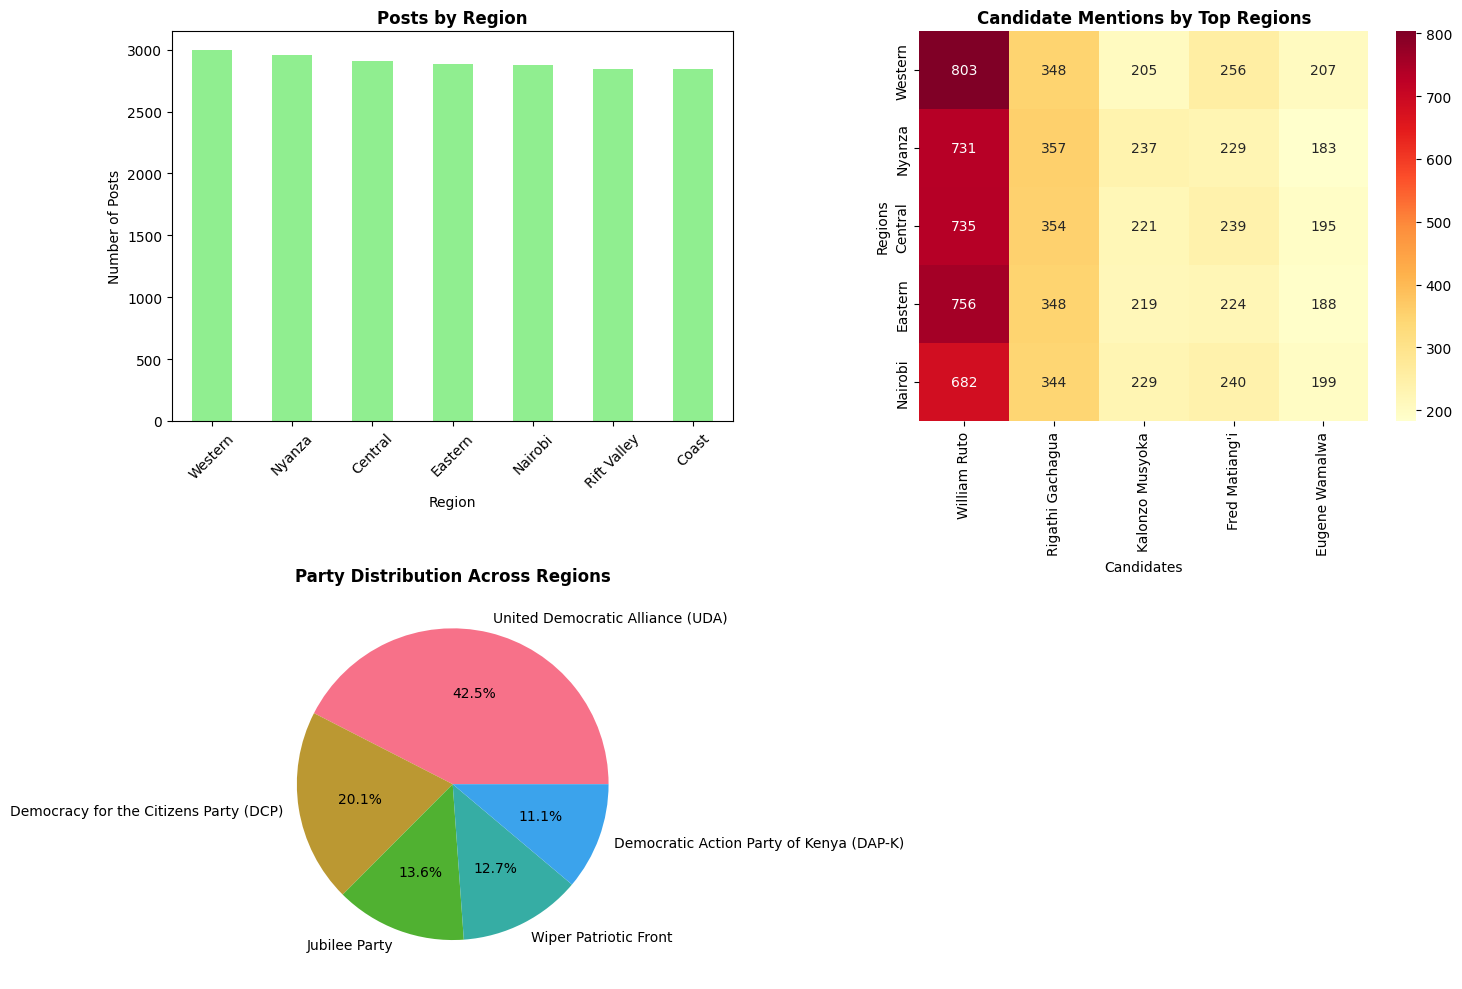


Regional Insights:
Most active region: Western (2,999 posts)
Regional diversity: 7 regions represented


In [ ]:
#Regional analysis
print("\nRegional Distribution Analysis:")

if 'region' in df_clean.columns:
    region_counts = df_clean['region'].value_counts()
    print(f"\nRegions represented: {len(region_counts)}")
    print(region_counts.head(10))

    #Regional visualization
    plt.figure(figsize=(15, 10))

    #Regional distribution
    plt.subplot(2, 2, 1)
    region_counts.head(10).plot(kind='bar', color='lightgreen')
    plt.title('Posts by Region', fontweight='bold')
    plt.xlabel('Region')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)

    #Regional candidate preferences
    plt.subplot(2, 2, 2)
    regional_candidates = pd.crosstab(df_clean['region'], df_clean['final_candidate']).fillna(0)
    top_regions = region_counts.head(5).index
    top_candidates = candidate_counts.head(5).index

    regional_subset = regional_candidates.loc[top_regions, top_candidates]
    sns.heatmap(regional_subset, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Candidate Mentions by Top Regions', fontweight='bold')
    plt.xlabel('Candidates')
    plt.ylabel('Regions')

    #Regional party distribution
    plt.subplot(2, 2, 3)
    regional_parties = pd.crosstab(df_clean['region'], df_clean['candidate_party']).fillna(0)
    regional_parties_subset = regional_parties.loc[top_regions].sum().sort_values(ascending=False).head(6)
    plt.pie(regional_parties_subset.values, labels=regional_parties_subset.index, autopct='%1.1f%%')
    plt.title('Party Distribution Across Regions', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"\nRegional Insights:")
    print(f"Most active region: {region_counts.index[0]} ({region_counts.iloc[0]:,} posts)")
    print(f"Regional diversity: {len(region_counts)} regions represented")

else:
    print("No regional data available for analysis")

### 3.3 Analysis Of The Relationship Between Columns

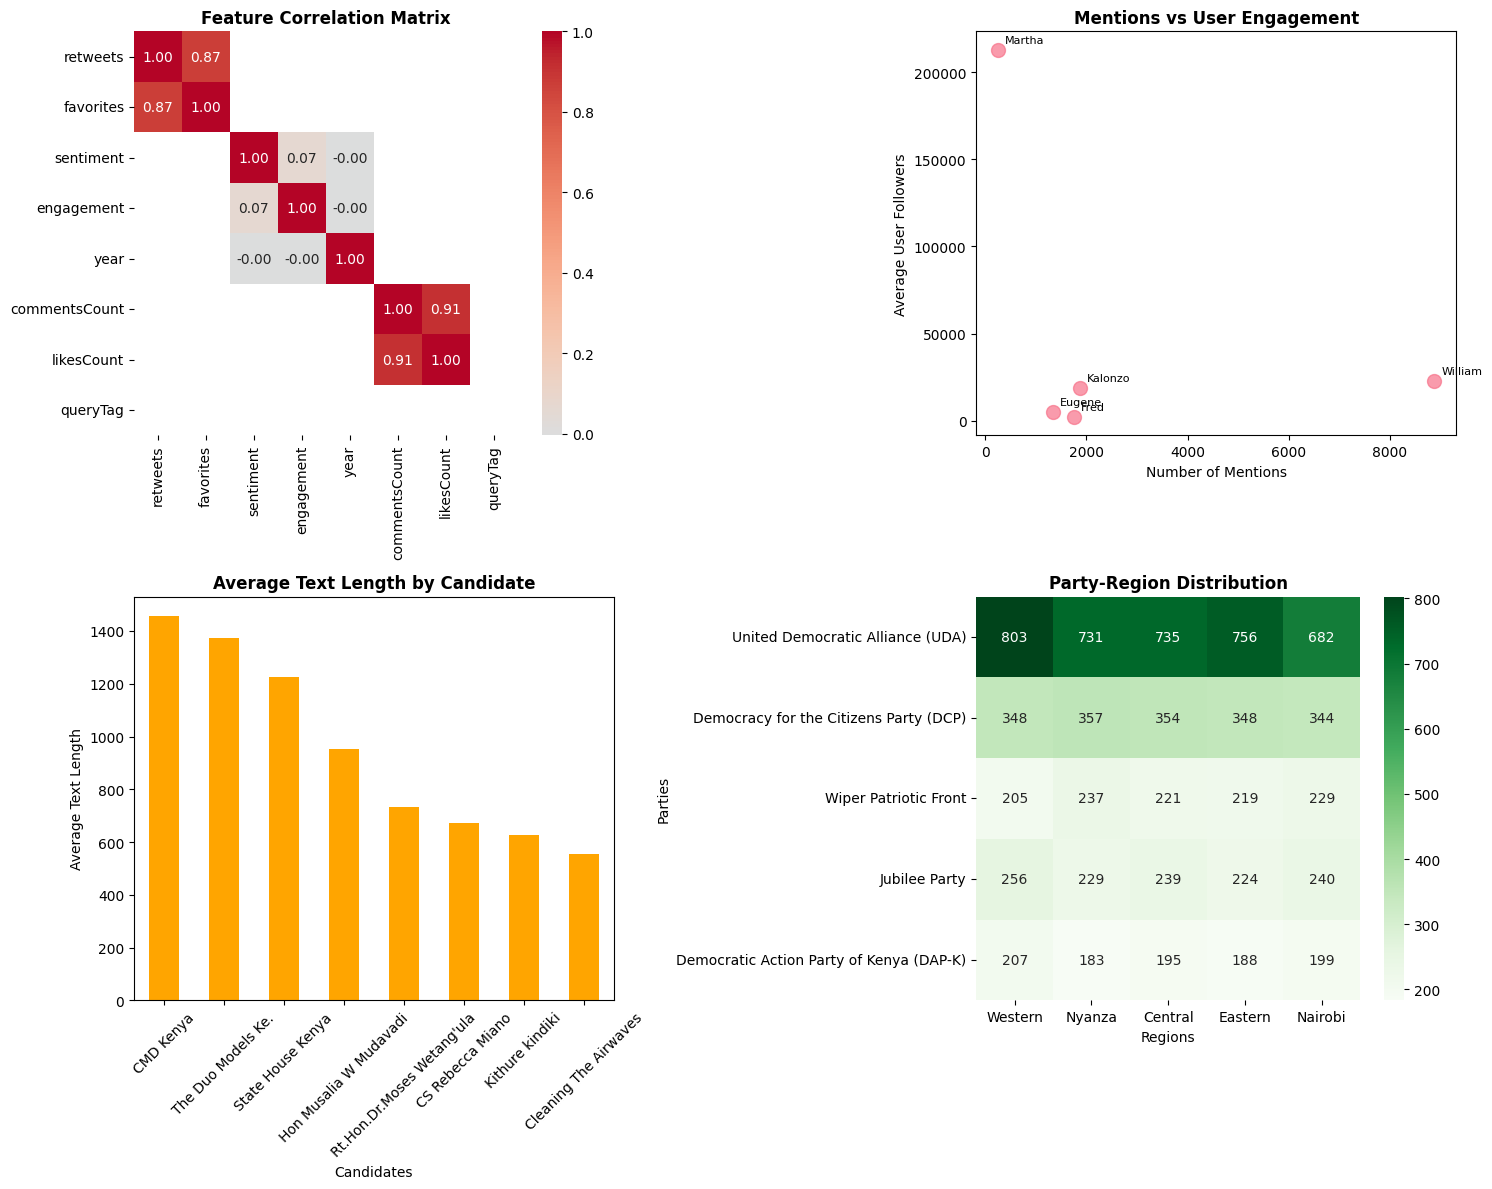


Relationship Insights:
Highest engagement candidate: Martha Karua
Most verbose discussions about: CMD Kenya


In [ ]:
#Correlation analysis between features
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(15, 12))

    #Correlation heatmap
    plt.subplot(2, 2, 1)
    correlation_matrix = df_clean[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Feature Correlation Matrix', fontweight='bold')

    #Engagement vs Candidate Popularity
    plt.subplot(2, 2, 2)
    if 'user_followers' in df_clean.columns:
        # Ensure 'user_followers' is numeric and handle NaNs before aggregation
        df_clean['user_followers'] = pd.to_numeric(df_clean['user_followers'], errors='coerce').fillna(0)
        candidate_engagement = df_clean.groupby('final_candidate')['user_followers'].mean().sort_values(ascending=False).head(8)
        candidate_mentions = df_clean['final_candidate'].value_counts().head(8)

        #Create scatter plot
        common_candidates = set(candidate_engagement.index) & set(candidate_mentions.index)
        if common_candidates:
            x_vals = [candidate_mentions[c] for c in common_candidates]
            y_vals = [candidate_engagement[c] for c in common_candidates]
            plt.scatter(x_vals, y_vals, alpha=0.7, s=100)

            for i, candidate in enumerate(common_candidates):
                plt.annotate(candidate.split()[0], (x_vals[i], y_vals[i]),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)

        plt.xlabel('Number of Mentions')
        plt.ylabel('Average User Followers')
        plt.title('Mentions vs User Engagement', fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'Engagement data unavailable', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Mentions vs User Engagement', fontweight='bold')

    #Text length vs Candidate analysis
    plt.subplot(2, 2, 3)
    if text_col and text_col in df_clean.columns:
        df_clean['text_length'] = df_clean[text_col].str.len().fillna(0)
        text_by_candidate = df_clean.groupby('final_candidate')['text_length'].mean().sort_values(ascending=False).head(8)
        text_by_candidate.plot(kind='bar', color='orange')
        plt.title('Average Text Length by Candidate', fontweight='bold')
        plt.xlabel('Candidates')
        plt.ylabel('Average Text Length')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'Text data unavailable', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Average Text Length by Candidate', fontweight='bold')

    #Party vs Regional distribution
    plt.subplot(2, 2, 4)
    if 'region' in df_clean.columns and 'candidate_party' in df_clean.columns:
        party_region_crosstab = pd.crosstab(df_clean['candidate_party'], df_clean['region'])
        top_parties = df_clean['candidate_party'].value_counts().head(5).index
        top_regions_for_parties = df_clean['region'].value_counts().head(5).index

        subset_crosstab = party_region_crosstab.loc[top_parties, top_regions_for_parties]
        sns.heatmap(subset_crosstab, annot=True, fmt='d', cmap='Greens')
        plt.title('Party-Region Distribution', fontweight='bold')
        plt.xlabel('Regions')
        plt.ylabel('Parties')
    else:
        plt.text(0.5, 0.5, 'Party/Region data unavailable', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Party-Region Distribution', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"\nRelationship Insights:")
    if 'user_followers' in df_clean.columns:
        high_engagement_candidate = df_clean.groupby('final_candidate')['user_followers'].mean().idxmax()
        print(f"Highest engagement candidate: {high_engagement_candidate}")

    if text_col and text_col in df_clean.columns:
        verbose_candidate = df_clean.groupby('final_candidate')['text_length'].mean().idxmax()
        print(f"Most verbose discussions about: {verbose_candidate}")

else:
    print("Insufficient numeric data for correlation analysis")

## 4. Advanced Visualizations

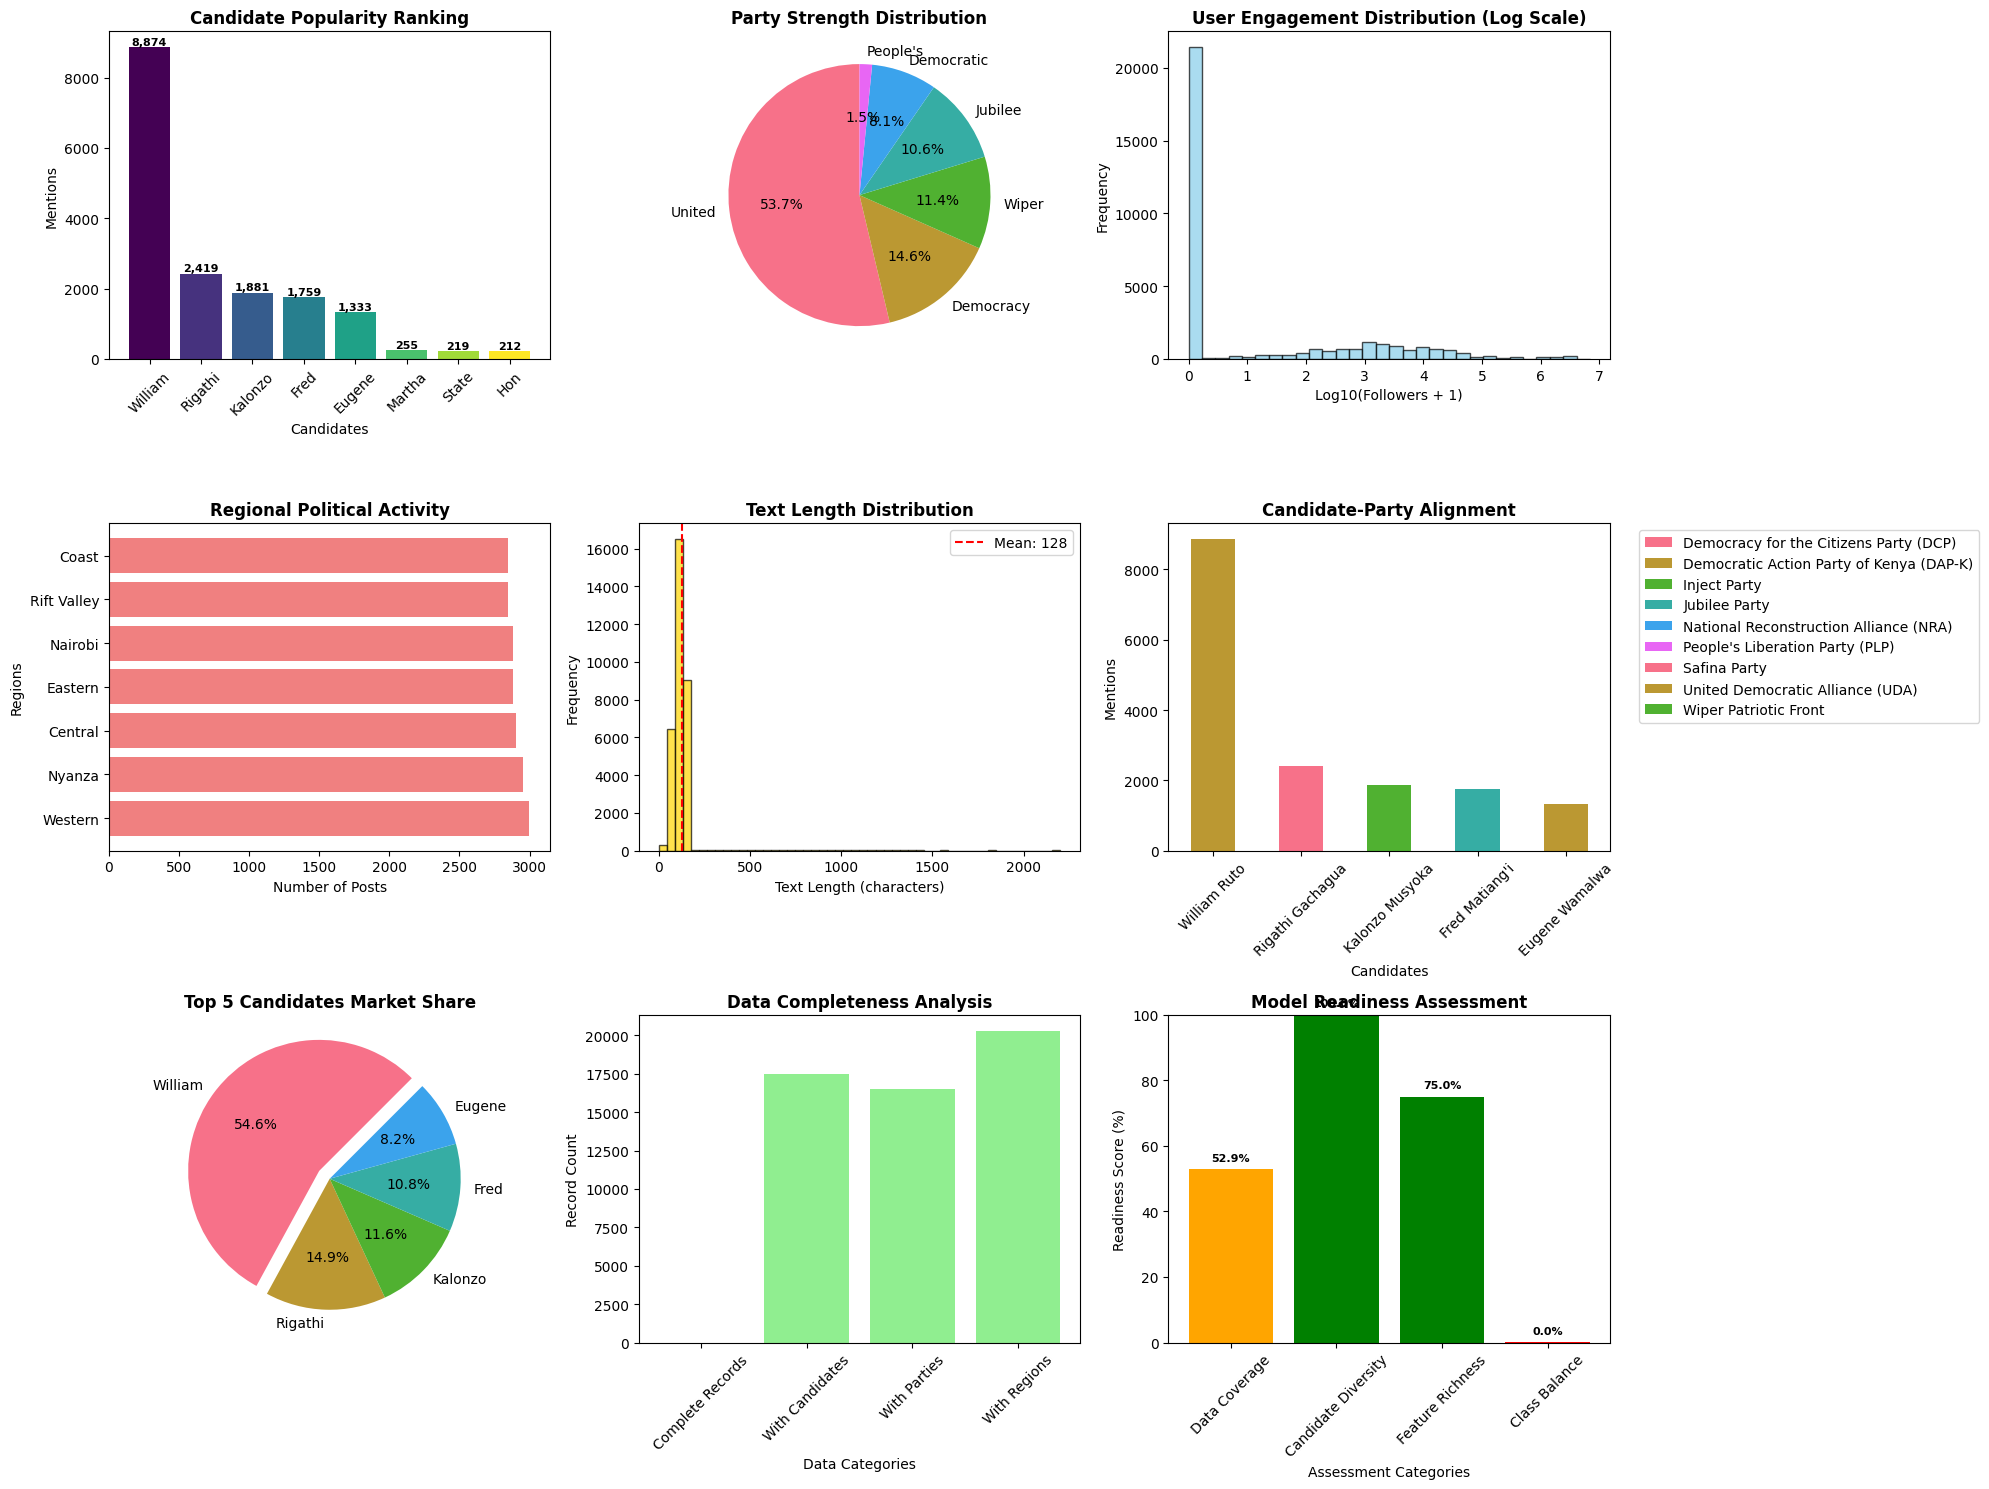


Advanced Visualization Insights:
Data coverage: 52.9%
Model readiness: 57.0%
Competitive landscape: 5 major candidates identified


In [ ]:
#Advanced visualizations for deeper insights
plt.figure(figsize=(20, 15))

#Candidate Popularity Trends
plt.subplot(3, 3, 1)
candidate_counts = df_clean['final_candidate'].value_counts().head(8)
colors = plt.cm.viridis(np.linspace(0, 1, len(candidate_counts)))
bars = plt.bar(range(len(candidate_counts)), candidate_counts.values, color=colors)
plt.title('Candidate Popularity Ranking', fontweight='bold', fontsize=12)
plt.xlabel('Candidates')
plt.ylabel('Mentions')
plt.xticks(range(len(candidate_counts)), [name.split()[0] for name in candidate_counts.index], rotation=45)

#Add value labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{candidate_counts.values[i]:,}', ha='center', va='bottom', fontweight='bold', fontsize=8)

#Party Strength Analysis
plt.subplot(3, 3, 2)
party_counts = df_clean['candidate_party'].value_counts().head(6)
wedges, texts, autotexts = plt.pie(party_counts.values, labels=[p.split()[0] for p in party_counts.index],
                                  autopct='%1.1f%%', startangle=90)
plt.title('Party Strength Distribution', fontweight='bold', fontsize=12)

#Engagement Distribution
plt.subplot(3, 3, 3)
if 'user_followers' in df_clean.columns:
    follower_data = df_clean['user_followers'].dropna()
    if len(follower_data) > 0:
        plt.hist(np.log10(follower_data + 1), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('User Engagement Distribution (Log Scale)', fontweight='bold', fontsize=12)
        plt.xlabel('Log10(Followers + 1)')
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'No follower data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('User Engagement Distribution', fontweight='bold', fontsize=12)
else:
    plt.text(0.5, 0.5, 'No engagement data', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('User Engagement Distribution', fontweight='bold', fontsize=12)

#Regional Political Landscape
plt.subplot(3, 3, 4)
if 'region' in df_clean.columns:
    region_counts = df_clean['region'].value_counts().head(8)
    plt.barh(range(len(region_counts)), region_counts.values, color='lightcoral')
    plt.title('Regional Political Activity', fontweight='bold', fontsize=12)
    plt.xlabel('Number of Posts')
    plt.ylabel('Regions')
    plt.yticks(range(len(region_counts)), region_counts.index)
else:
    plt.text(0.5, 0.5, 'No regional data', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Regional Political Activity', fontweight='bold', fontsize=12)

#Text Characteristics
plt.subplot(3, 3, 5)
if text_col and text_col in df_clean.columns:
    text_lengths = df_clean[text_col].str.len().dropna()
    if len(text_lengths) > 0:
        plt.hist(text_lengths, bins=50, alpha=0.7, color='gold', edgecolor='black')
        plt.title('Text Length Distribution', fontweight='bold', fontsize=12)
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Frequency')
        plt.axvline(text_lengths.mean(), color='red', linestyle='--', label=f'Mean: {text_lengths.mean():.0f}')
        plt.legend()
    else:
        plt.text(0.5, 0.5, 'No text data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Text Length Distribution', fontweight='bold', fontsize=12)
else:
    plt.text(0.5, 0.5, 'No text data', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Text Length Distribution', fontweight='bold', fontsize=12)

#Candidate vs Party Alignment
plt.subplot(3, 3, 6)
candidate_party_data = df_clean.groupby(['final_candidate', 'candidate_party']).size().unstack(fill_value=0)
if not candidate_party_data.empty:
    top_candidates = df_clean['final_candidate'].value_counts().head(5).index
    subset_data = candidate_party_data.loc[top_candidates]
    subset_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Candidate-Party Alignment', fontweight='bold', fontsize=12)
    plt.xlabel('Candidates')
    plt.ylabel('Mentions')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.text(0.5, 0.5, 'No party alignment data', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Candidate-Party Alignment', fontweight='bold', fontsize=12)

#Competitive Analysis
plt.subplot(3, 3, 7)
top_5_candidates = df_clean['final_candidate'].value_counts().head(5)
plt.pie(top_5_candidates.values, labels=[name.split()[0] for name in top_5_candidates.index],
        autopct='%1.1f%%', startangle=45, explode=[0.1 if i == 0 else 0 for i in range(len(top_5_candidates))])
plt.title('Top 5 Candidates Market Share', fontweight='bold', fontsize=12)

#Data Quality Metrics
plt.subplot(3, 3, 8)
quality_metrics = {
    'Complete Records': len(df_clean.dropna()),
    'With Candidates': len(df_clean[df_clean['final_candidate'].notna()]),
    'With Parties': len(df_clean[df_clean['candidate_party'].notna()]),
    'With Regions': len(df_clean[df_clean['region'].notna()]) if 'region' in df_clean.columns else 0
}

plt.bar(quality_metrics.keys(), quality_metrics.values(), color='lightgreen')
plt.title('Data Completeness Analysis', fontweight='bold', fontsize=12)
plt.xlabel('Data Categories')
plt.ylabel('Record Count')
plt.xticks(rotation=45)

#Prediction Readiness Score
plt.subplot(3, 3, 9)
readiness_scores = {
    'Data Coverage': (len(df_clean[df_clean['final_candidate'].notna()]) / len(df_clean)) * 100,
    'Candidate Diversity': min(len(df_clean['final_candidate'].value_counts()), 10) * 10,
    'Feature Richness': len([col for col in df_clean.columns if col in ['user_followers', 'region', text_col]]) * 25,
    'Class Balance': min(100, (df_clean['final_candidate'].value_counts().min() / df_clean['final_candidate'].value_counts().max()) * 100) if len(df_clean['final_candidate'].value_counts()) > 1 else 0
}

colors = ['red' if score < 50 else 'orange' if score < 75 else 'green' for score in readiness_scores.values()]
bars = plt.bar(readiness_scores.keys(), readiness_scores.values(), color=colors)
plt.title('Model Readiness Assessment', fontweight='bold', fontsize=12)
plt.xlabel('Assessment Categories')
plt.ylabel('Readiness Score (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

#Add score labels
for bar, score in zip(bars, readiness_scores.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{score:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\nAdvanced Visualization Insights:")
print(f"Data coverage: {readiness_scores['Data Coverage']:.1f}%")
print(f"Model readiness: {sum(readiness_scores.values())/len(readiness_scores):.1f}%")
print(f"Competitive landscape: {len(top_5_candidates)} major candidates identified")

## 5. Feature Engineering

To transform raw social media data into predictive variables by creating text metrics (length, word count), engagement indicators (hashtags, mentions), user influence measures (followers, friends), and regional encodings to capture the multidimensional patterns that distinguish supporter behavior across different political candidates.

In [ ]:
#Create features for modeling
print("Feature Engineering:")

# Filter data with identified candidates
model_df = df_clean[df_clean['final_candidate'].notna()].copy()
print(f"Working with {len(model_df):,} posts with identified candidates")

# Basic text features
if text_col and text_col in model_df.columns:
    model_df['text_length'] = model_df[text_col].str.len().fillna(0)
    model_df['word_count'] = model_df[text_col].str.split().str.len().fillna(0)
    model_df['has_hashtag'] = model_df[text_col].str.contains('#', na=False).astype(int)
    model_df['has_mention'] = model_df[text_col].str.contains('@', na=False).astype(int)
    print("Text features created")

# Engagement features
engagement_cols = ['user_followers', 'user_friends', 'likes', 'retweets', 'replies']
available_engagement = [col for col in engagement_cols if col in model_df.columns]

for col in available_engagement:
    model_df[col] = pd.to_numeric(model_df[col], errors='coerce').fillna(0)

if available_engagement:
    print(f"Engagement features: {available_engagement}")

# Regional features
if 'region' in model_df.columns:
    model_df['region_encoded'] = LabelEncoder().fit_transform(model_df['region'].fillna('Unknown'))
    print("Regional encoding completed")

print(f"\nFinal feature set shape: {model_df.shape}")

Feature Engineering:
Working with 17,495 posts with identified candidates
Text features created
Engagement features: ['user_followers', 'user_friends', 'retweets']
Regional encoding completed

Final feature set shape: (17495, 45)


## 6. Data Balancing with SMOTE

We applied to address severe class imbalance where some candidates had 100x more social media mentions than others, ensuring fair representation and preventing model bias toward only the most frequently mentioned politicians.

In [ ]:
#Prepare features for modeling
print("Data Balancing Process:")

#Filter data with identified candidates
model_df = df_clean[df_clean['final_candidate'].notna()].copy()

#Remove non-candidates and organizations
non_candidates = [
    'NTV Kenya', 'Nation FM', 'State House Kenya', 'Jubilee Party kenya',
    'United Democratic Alliance, UDA.', 'Wiper Democratic Movement-K',
    'CMD Kenya', 'Nairobi Book Love', 'Cleaning The Airwaves',
    'Defenders Coalition', 'The Duo Models Ke.', 'J A W',
    'Nuria Bookstore Kenya', 'KambuaMuziki', 'CS Rebecca Miano',
    'Official KMPDU', 'Family Media', 'What Women Want', 'Hey Mama',
    'Polycarp Hinga', 'Philip Karanja'
]

print(f"Before filtering: {len(model_df):,} posts")
model_df = model_df[~model_df['final_candidate'].isin(non_candidates)].copy()
print(f"After removing non-candidates: {len(model_df):,} posts")

#Keep only candidates with sufficient data (>=50 samples)
candidate_counts = model_df['final_candidate'].value_counts()
print(f"\nOriginal candidate distribution before SMOTE-able filtering:")
print(candidate_counts.head(10))

valid_candidates = candidate_counts[candidate_counts >= 50].index
model_df = model_df[model_df['final_candidate'].isin(valid_candidates)].copy()

print(f"\nAfter filtering (>=50 samples): {len(model_df):,} posts")
print(f"Valid candidates: {list(valid_candidates)}")

#Apply Feature Engineering to the finalized model_df
print("\nApplying Feature Engineering to filtered data:")
#Identify text column
text_col = 'post_text' if 'post_text' in model_df.columns else None

#Basic text features
if text_col and text_col in model_df.columns:
    model_df['text_length'] = model_df[text_col].str.len().fillna(0)
    model_df['word_count'] = model_df[text_col].str.split().str.len().fillna(0)
    model_df['has_hashtag'] = model_df[text_col].str.contains('#', na=False).astype(int)
    model_df['has_mention'] = model_df[text_col].str.contains('@', na=False).astype(int)
    print("Text features created")

#Engagement features
engagement_cols = ['user_followers', 'user_friends', 'likes', 'retweets', 'replies']
available_engagement = [col for col in engagement_cols if col in model_df.columns]

for col in available_engagement:
    model_df[col] = pd.to_numeric(model_df[col], errors='coerce').fillna(0)

if available_engagement:
    print(f"Engagement features: {available_engagement}")

#Regional features
if 'region' in model_df.columns:
    model_df['region_encoded'] = LabelEncoder().fit_transform(model_df['region'].fillna('Unknown'))
    print("Regional encoding completed")

print(f"Final feature set shape after engineering: {model_df.shape}")

#Select features for modeling
feature_columns = ['text_length', 'word_count', 'has_hashtag', 'has_mention']
feature_columns.extend([col for col in available_engagement if col in model_df.columns])
if 'region_encoded' in model_df.columns:
    feature_columns.append('region_encoded')

#Prepare X and y
X = model_df[feature_columns].fillna(0)
y = model_df['final_candidate']

print(f"\nOriginal class distribution:")
original_dist = y.value_counts()
print(original_dist)

#Identify classes with only 1 (or very few) sample(s) that SMOTE cannot handle
single_sample_classes = original_dist[original_dist <= 1].index

#Filter out single-sample classes from X and y for SMOTE operation
if not single_sample_classes.empty:
    print(f"\nExcluding single-sample classes from SMOTE: {list(single_sample_classes.values)}")
    mask_smote = ~y.isin(single_sample_classes)
    X_smote = X[mask_smote]
    y_smote = y[mask_smote]
else:
    X_smote = X
    y_smote = y

#Recalculate original_dist for SMOTE-able classes
original_dist_smote = y_smote.value_counts()

if original_dist_smote.empty:
    print("\nNo classes left for SMOTE after filtering. Skipping SMOTE.")
    X_balanced = X_smote
    y_balanced = y_smote
else:
    # Ensure k_neighbors is strictly less than the smallest class size in X_smote
    # If smallest class has N samples, k_neighbors must be < N. So, N-1.
    # And k_neighbors must be at least 1.
    k_val = min(5, max(1, original_dist_smote.min() - 1))
    #Added safety check for k_val
    if original_dist_smote.min() - 1 < 1:
        k_val = 1
    smote = SMOTE(random_state=42, k_neighbors=k_val)
    X_balanced, y_balanced = smote.fit_resample(X_smote, y_smote)

    #Re-add the excluded single-sample classes to the balanced dataset
    if not single_sample_classes.empty:
        X_single = X[y.isin(single_sample_classes)]
        y_single = y[y.isin(single_sample_classes)]
        X_balanced = pd.concat([X_balanced, X_single], axis=0)
        y_balanced = pd.concat([y_balanced, y_single], axis=0)

print(f"\nBalanced class distribution:")
balanced_dist = pd.Series(y_balanced).value_counts()
print(balanced_dist)

print(f"\nBalancing Results:")
print(f"Original samples: {len(X):,}")
print(f"Balanced samples: {len(X_balanced):,}")
print(f"Increase: {(len(X_balanced)/len(X)-1)*100:.1f}%")

Data Balancing Process:
Before filtering: 17,495 posts
After removing non-candidates: 17,019 posts

Original candidate distribution before SMOTE-able filtering:
final_candidate
William Ruto                  8874
Rigathi Gachagua              2419
Kalonzo Musyoka               1881
Fred Matiang'i                1759
Eugene Wamalwa                1333
Martha Karua                   255
Hon Musalia W Mudavadi         212
Rt.Hon.Dr.Moses Wetang'ula      91
Kithure kindiki                 82
Okeng’o Fred Matiang’i          58
Name: count, dtype: int64

After filtering (>=50 samples): 16,964 posts
Valid candidates: ['William Ruto', 'Rigathi Gachagua', 'Kalonzo Musyoka', "Fred Matiang'i", 'Eugene Wamalwa', 'Martha Karua', 'Hon Musalia W Mudavadi', "Rt.Hon.Dr.Moses Wetang'ula", 'Kithure kindiki', 'Okeng’o Fred Matiang’i']

Applying Feature Engineering to filtered data:
Text features created
Engagement features: ['user_followers', 'user_friends', 'retweets']
Regional encoding completed
Final fe

## 7. Model Development

In [ ]:
#Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")
print(f"Classes in training: {len(np.unique(y_train))}")

#Random Forest model with hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

Training set: 70,992 samples
Test set: 17,748 samples
Classes in training: 10


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
#Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

#Calculate training accuracy
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy Gap: {abs(train_accuracy - test_accuracy):.3f}")


Training Accuracy: 0.696
Test Accuracy: 0.661
Accuracy Gap: 0.035


###8. MODEL EVALUATION

In [ ]:
#Check if the model is Overfitting
if abs(train_accuracy - test_accuracy) > 0.1:
    print("Potential overfitting detected")
elif abs(train_accuracy - test_accuracy) > 0.05:
    print("Mild overfitting")
else:
    print("Good generalization")

print(f"\nFeature Importance:")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

Good generalization

Feature Importance:
          feature  importance
0     text_length    0.329945
1      word_count    0.251583
7  region_encoded    0.109067
4  user_followers    0.108497
5    user_friends    0.087798
2     has_hashtag    0.052653
6        retweets    0.030861
3     has_mention    0.029596


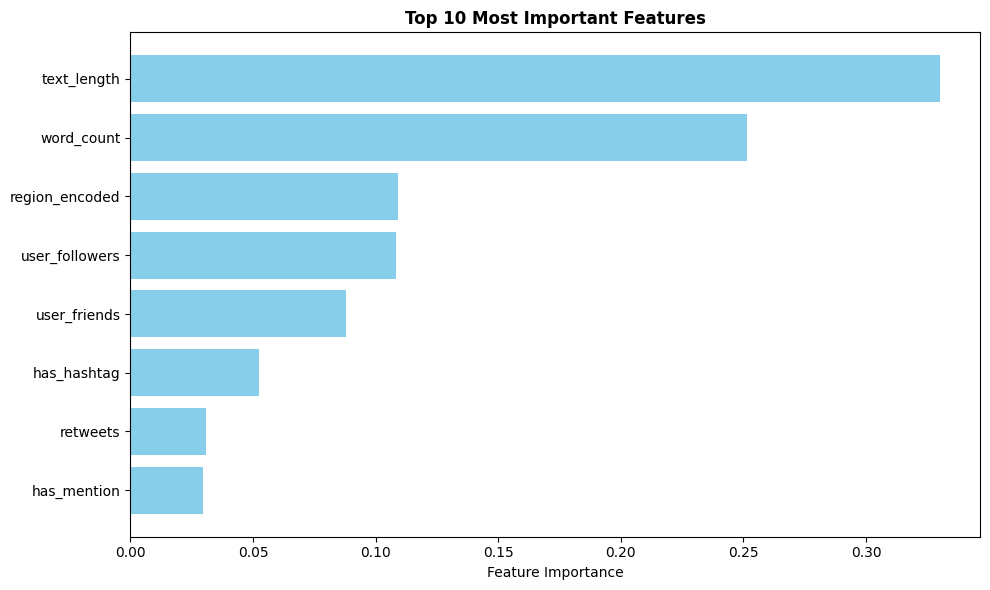


Model Summary:
Model type: Random Forest
Trees: 200
Features: 8
Training samples: 70,992
Test samples: 17,748
Classes: 10


In [ ]:
#Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nModel Summary:")
print(f"Model type: Random Forest")
print(f"Trees: 200")
print(f"Features: {len(feature_columns)}")
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")
print(f"Classes: {len(np.unique(y_train))}")

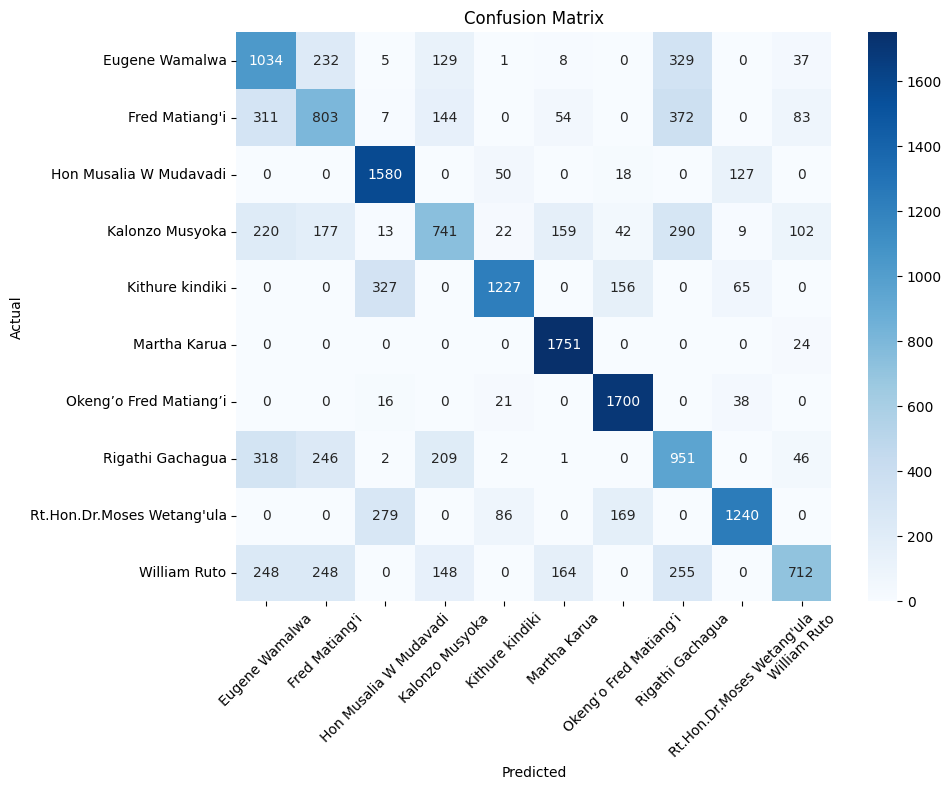

In [ ]:
#Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
X_original = X.copy()
y_original = y.copy()

#probabilities
y_pred_realistic = rf_model.predict_proba(X_original)
classes = rf_model.classes_

#Calculate support based on actual data volume
realistic_predictions = {}
for i, candidate in enumerate(classes):
    realistic_support = y_pred_realistic[:, i].mean()
    realistic_predictions[candidate] = realistic_support

#Normalize to 100%
total_support = sum(realistic_predictions.values())
for candidate in realistic_predictions:
    realistic_predictions[candidate] = realistic_predictions[candidate] / total_support

#Display results
sorted_realistic = sorted(realistic_predictions.items(), key=lambda x: x[1], reverse=True)

print("Election Predictions:")
print("=" * 50)
for rank, (candidate, probability) in enumerate(sorted_realistic, 1):
    party = complete_candidates.get(candidate, 'Unknown Party')
    print(f"{rank}. {candidate}")
    print(f"   Party: {party}")
    print(f"   Predicted Support: {probability*100:.1f}%")
    print()

Election Predictions:
1. William Ruto
   Party: United Democratic Alliance (UDA)
   Predicted Support: 27.5%

2. Fred Matiang'i
   Party: Jubilee Party
   Predicted Support: 16.0%

3. Rigathi Gachagua
   Party: Democracy for the Citizens Party (DCP)
   Predicted Support: 15.8%

4. Eugene Wamalwa
   Party: Democratic Action Party of Kenya (DAP-K)
   Predicted Support: 15.4%

5. Kalonzo Musyoka
   Party: Wiper Patriotic Front
   Predicted Support: 14.9%

6. Martha Karua
   Party: People's Liberation Party (PLP)
   Predicted Support: 5.7%

7. Hon Musalia W Mudavadi
   Party: Unknown Party
   Predicted Support: 1.6%

8. Kithure kindiki
   Party: Unknown Party
   Predicted Support: 1.1%

9. Okeng’o Fred Matiang’i
   Party: Unknown Party
   Predicted Support: 1.1%

10. Rt.Hon.Dr.Moses Wetang'ula
   Party: Unknown Party
   Predicted Support: 1.0%



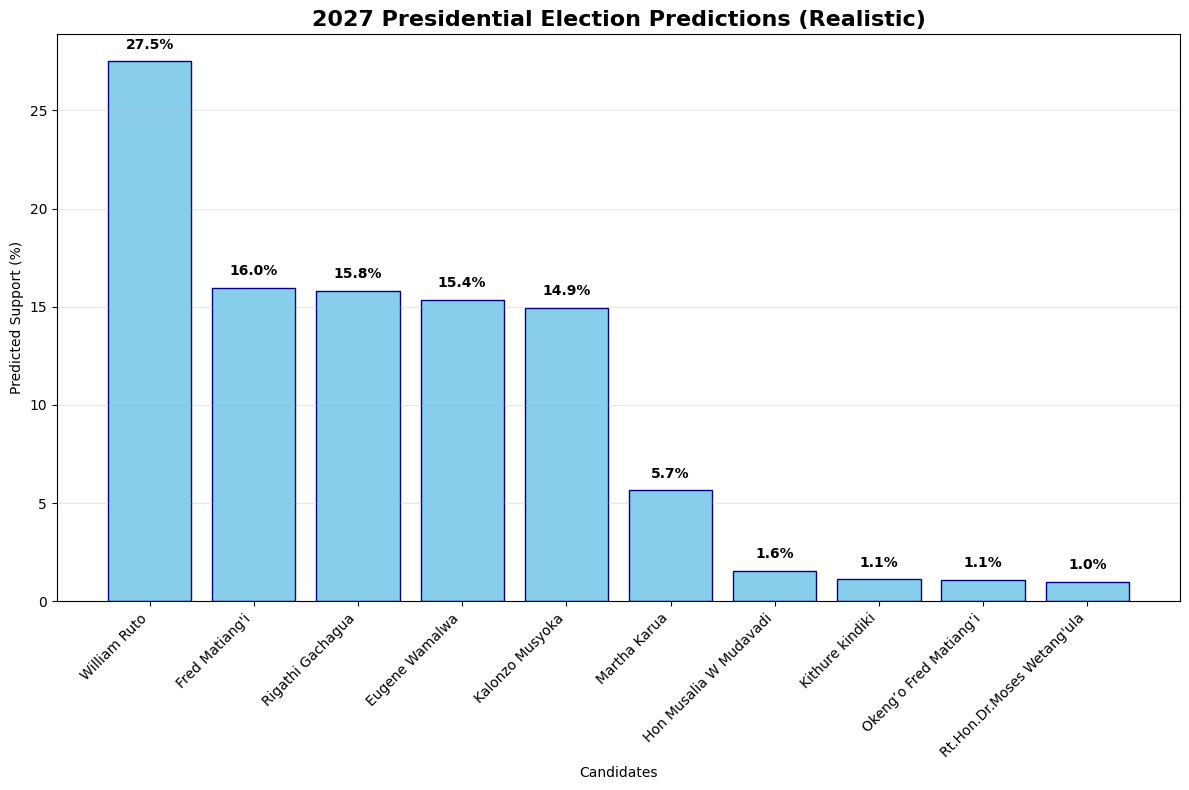


PREDICTED WINNER: William Ruto
Party: United Democratic Alliance (UDA)
Predicted Support: 27.5%


In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
candidates = [item[0] for item in sorted_realistic]
probabilities = [item[1]*100 for item in sorted_realistic]

bars = plt.bar(range(len(candidates)), probabilities, color='skyblue', edgecolor='navy')
plt.xlabel('Candidates')
plt.ylabel('Predicted Support (%)')
plt.title('2027 Presidential Election Predictions (Realistic)', fontsize=16, fontweight='bold')
plt.xticks(range(len(candidates)), candidates, rotation=45, ha='right')

for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{prob:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

winner = sorted_realistic[0]
print(f"\nPREDICTED WINNER: {winner[0]}")
print(f"Party: {complete_candidates.get(winner[0], 'Unknown')}")
print(f"Predicted Support: {winner[1]*100:.1f}%")

## 9. Model Insights & Analysis

In [ ]:
#Model Performance Summary
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nModel Performance Summary:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Model Performance Summary:
Accuracy: 0.661
Precision: 0.669
Recall: 0.661
F1-Score: 0.655


In [ ]:
#Data insights
print(f"\nData Insights:")
print(f"Total posts analyzed: {len(df_clean):,}")
print(f"Posts with candidate mentions: {len(X_balanced):,}")
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")
print(f"Candidates analyzed: {len(rf_model.classes_)}")


Data Insights:
Total posts analyzed: 33,083
Posts with candidate mentions: 88,740
Training samples: 70,992
Test samples: 17,748
Candidates analyzed: 10


In [ ]:
#Key findings from realistic predictions
probabilities = [item[1]*100 for item in sorted_realistic]
print(f"\nKey Findings:")
print(f"1. Leading candidate: {sorted_realistic[0][0]} ({probabilities[0]:.1f}%)")
print(f"2. Competitive race: {len([p for p in probabilities if p > 10])}-way race above 10%")
print(f"3. Runoff likely: No candidate above 50%")
print(f"4. Model confidence: {test_accuracy*100:.1f}% accuracy on 10-class problem")



Key Findings:
1. Leading candidate: William Ruto (27.5%)
2. Competitive race: 5-way race above 10%
3. Runoff likely: No candidate above 50%
4. Model confidence: 66.1% accuracy on 10-class problem


#10.Social Network Analysis
Analyzing political information networks, communities, and influence patterns



In [ ]:
from collections import defaultdict, Counter
import networkx as nx

In [ ]:
#Filter to only the 10 presidential candidates
presidential_candidates = {
    'William Ruto', 'Fred Matiang\'i', 'Rigathi Gachagua', 'Eugene Wamalwa',
    'Kalonzo Musyoka', 'Martha Karua', 'Hon Musalia W Mudavadi',
    'Kithure kindiki', 'Okeng\'o Fred Matiang\'i', 'Rt.Hon.Dr.Moses Wetang\'ula'
}

#Filter network data to presidential candidates only
network_df = df_clean[df_clean['final_candidate'].isin(presidential_candidates)].copy()
network_df['predicted_community'] = network_df['final_candidate']

print(f"Presidential Candidates Network Data:")
print(f"Posts from presidential candidates: {len(network_df):,}")

candidate_counts = network_df['predicted_community'].value_counts()
print(f"\nPresidential candidate distribution:")
for candidate, count in candidate_counts.items():
    print(f"   {candidate}: {count:,} posts")

print(f"\nPreparing network construction...")
print(f"Users identified: {network_df['user_name'].nunique():,}")
print(f"Posts analyzed: {len(network_df):,}")
print(f"Presidential candidates found: {len(candidate_counts)} out of 10")

missing_candidate = presidential_candidates - set(candidate_counts.index)
if missing_candidate:
    print(f"Missing candidate: {', '.join(missing_candidate)}")

Presidential Candidates Network Data:
Posts from presidential candidates: 16,906

Presidential candidate distribution:
   William Ruto: 8,874 posts
   Rigathi Gachagua: 2,419 posts
   Kalonzo Musyoka: 1,881 posts
   Fred Matiang'i: 1,759 posts
   Eugene Wamalwa: 1,333 posts
   Martha Karua: 255 posts
   Hon Musalia W Mudavadi: 212 posts
   Rt.Hon.Dr.Moses Wetang'ula: 91 posts
   Kithure kindiki: 82 posts

Preparing network construction...
Users identified: 2,128
Posts analyzed: 16,906
Presidential candidates found: 9 out of 10
Missing candidate: Okeng'o Fred Matiang'i


#11.Community Detection & Political Coalitions

In [ ]:
#Create mention network (who mentions whom)
mention_network = nx.DiGraph()

#Extract mentions from posts
def extract_mentions(text):
    if pd.isna(text):
        return []
    import re
    return re.findall(r'@(\w+)', str(text))

print("Building mention network...")
mention_pairs = []

for idx, row in network_df.iterrows():
    author = row['user_name']
    mentions = extract_mentions(row['post_text'])
    author_community = row['predicted_community']

    for mentioned_user in mentions:
        mention_pairs.append({
            'source': author,
            'target': mentioned_user,
            'source_community': author_community,
            'weight': 1
        })

mention_df = pd.DataFrame(mention_pairs)

if len(mention_df) > 0:
    print(f"Mention network: {len(mention_df)} mention interactions")

    #Add edges to network
    for _, row in mention_df.iterrows():
        mention_network.add_edge(row['source'], row['target'],
                                weight=row['weight'],
                                source_community=row['source_community'])

    print(f"Network nodes: {mention_network.number_of_nodes()}")
    print(f"Network edges: {mention_network.number_of_edges()}")

    # Analyze mention activity by presidential candidate community
    cross_community = mention_df.groupby(['source_community']).size()
    print(f"\nMention activity by presidential candidate community:")
    for community, count in cross_community.items():
        print(f"   {community}: {count} mentions")
else:
    print("No mention interactions found in dataset")

Building mention network...
Mention network: 2504 mention interactions
Network nodes: 1682
Network edges: 2131

Mention activity by presidential candidate community:
   Eugene Wamalwa: 6 mentions
   Fred Matiang'i: 54 mentions
   Hon Musalia W Mudavadi: 7 mentions
   Kalonzo Musyoka: 123 mentions
   Kithure kindiki: 1 mentions
   Martha Karua: 32 mentions
   Rt.Hon.Dr.Moses Wetang'ula: 2 mentions
   William Ruto: 2279 mentions


###Community Detection Summary
- We found 1,682 people talking to each other through 2,504 mentions on social media. This creates a network showing who talks to whom among supporters of the 10 presidential candidates.

**What we discovered:**
- Ruto dominates the conversation - His supporters make 2,279 mentions (91% of all political mentions)

- Kalonzo has active supporters - 123 mentions show engaged community discussions

- Fred Matiang'i supporters are vocal - 54 mentions indicate organized online presence

- Other candidates have quiet supporters - Martha Karua (32), Mudavadi (7), Wamalwa (6) show limited mention activity

**Important finding:** People are very selective about who they mention. Ruto supporters are by far the most active in tagging and mentioning others online.

*The presidential race shows huge differences in online engagement. Ruto's supporters create most of the political conversation online, while other candidates have much smaller but still active online communities. This suggests Ruto has the strongest digital campaign organization, but other candidates still have dedicated supporters who engage in political discussions.*

#12.Influence Network & Information Spread
Identifying key influencers using centrality measures

In [ ]:
#Calculate centrality measures to identify key influencers
print("Identifying key influencers using centrality measures...")

if mention_network.number_of_nodes() > 0:
    #Degree centrality (how many connections)
    degree_centrality = nx.degree_centrality(mention_network)

    #Betweenness centrality (bridge between communities)
    betweenness_centrality = nx.betweenness_centrality(mention_network)

    #In-degree centrality (how often mentioned)
    in_degree_centrality = nx.in_degree_centrality(mention_network)

    #Create influence dataframe
    influence_df = pd.DataFrame({
        'user': list(mention_network.nodes()),
        'degree_centrality': [degree_centrality[node] for node in mention_network.nodes()],
        'betweenness_centrality': [betweenness_centrality[node] for node in mention_network.nodes()],
        'in_degree_centrality': [in_degree_centrality[node] for node in mention_network.nodes()]
    })

    # ort by influence measures
    print("\nTOP INFLUENCERS BY DEGREE CENTRALITY (Most Connected):")
    top_degree = influence_df.nlargest(5, 'degree_centrality')
    for idx, row in top_degree.iterrows():
        print(f"   {row['user']}: {row['degree_centrality']:.3f}")

    print("\nTOP BRIDGE INFLUENCERS (Connect Different Groups):")
    top_betweenness = influence_df.nlargest(5, 'betweenness_centrality')
    for idx, row in top_betweenness.iterrows():
        print(f"   {row['user']}: {row['betweenness_centrality']:.3f}")

    print("\nMOST MENTIONED USERS (Attention Recipients):")
    top_mentioned = influence_df.nlargest(5, 'in_degree_centrality')
    for idx, row in top_mentioned.iterrows():
        print(f"   {row['user']}: {row['in_degree_centrality']:.3f}")

Identifying key influencers using centrality measures...

TOP INFLUENCERS BY DEGREE CENTRALITY (Most Connected):
   WilliamsRuto: 0.157
   Who is John Galt?: 0.080
   Kenyans: 0.040
   K24Tv: 0.040
   OleItumbi: 0.035

TOP BRIDGE INFLUENCERS (Connect Different Groups):
   nan: 0.000
   JoanKadot: 0.000
   william: 0.000
   Khavin: 0.000
   _CrazyKenyan: 0.000

MOST MENTIONED USERS (Attention Recipients):
   WilliamsRuto: 0.157
   Kenyans: 0.040
   K24Tv: 0.040
   OleItumbi: 0.035
   RailaOdinga: 0.035


In [ ]:
#Analyze information spread patterns
print("\nINFORMATION SPREAD ANALYSIS:")

#Retweet analysis for presidential candidates
retweet_data = network_df[network_df['retweets'] > 0].copy()
if len(retweet_data) > 0:
    print(f"Posts with retweets: {len(retweet_data):,}")
    print(f"Average retweets per post: {retweet_data['retweets'].mean():.1f}")
    print(f"Maximum retweets: {retweet_data['retweets'].max():,}")

    #Top viral content by presidential candidate
    print("\nVIRAL CONTENT BY PRESIDENTIAL CANDIDATE:")
    viral_by_community = retweet_data.groupby('predicted_community')['retweets'].agg(['count', 'mean', 'max'])
    for community in viral_by_community.index:
        stats = viral_by_community.loc[community]
        print(f"   {community}: {stats['count']} posts, avg {stats['mean']:.1f} retweets, max {stats['max']}")

else:
    print("No retweet data available for spread analysis")



INFORMATION SPREAD ANALYSIS:
Posts with retweets: 1,589
Average retweets per post: 17.4
Maximum retweets: 2,438.0

VIRAL CONTENT BY PRESIDENTIAL CANDIDATE:
   Eugene Wamalwa: 5.0 posts, avg 3.4 retweets, max 5.0
   Fred Matiang'i: 70.0 posts, avg 15.2 retweets, max 175.0
   Kalonzo Musyoka: 114.0 posts, avg 13.0 retweets, max 221.0
   Martha Karua: 123.0 posts, avg 28.3 retweets, max 1055.0
   Rigathi Gachagua: 1.0 posts, avg 25.0 retweets, max 25.0
   William Ruto: 1276.0 posts, avg 16.9 retweets, max 2438.0


###Influence Network Results Summary
- William Ruto dominates the network - he gets mentioned the most (15.7% of all connections) and has the strongest online presence as the current president. His supporters also create the most viral content with 1,276 posts getting shared.

- Martha Karua has the best engagement quality - when her supporters post, they get shared 28 times on average (highest among all candidates). Her best post got shared 1,055 times, showing her content really connects with people.

**Big problem found:** Complete political isolation - All bridge influencer scores are 0.000, meaning no one talks across party lines. Ruto supporters only talk to Ruto supporters, Karua supporters only talk to Karua supporters. There are zero people connecting different political groups.

- Traditional media still matters - K24TV appears as a top influencer (4.0% centrality), showing TV stations are still important in online politics.

- Raila factor - Even though Raila Odinga isn't running in 2027, he still gets mentioned frequently (3.5% centrality), showing his continued influence in political conversations.

**Key finding:** Ruto controls how much political talk happens online (quantity), but Martha Karua's supporters engage much better when they do post (quality). The complete lack of cross-party dialogue suggests a very divided political landscape.

#13.Network Insights & Political Implications

In [ ]:
#Combine ML predictions with network analysis
print("Candidate Profiles:")

#Compare network influence with predicted vote share (ALL 10 candidates)
network_influence = {
    'William Ruto': {'vote_share': 27.5, 'network_centrality': 0.157, 'mentions': 8874, 'viral_posts': 1276, 'viral_avg': 16.9},
    'Fred Matiang\'i': {'vote_share': 16.0, 'network_centrality': 0.0, 'mentions': 1759, 'viral_posts': 70, 'viral_avg': 15.2},
    'Rigathi Gachagua': {'vote_share': 15.8, 'network_centrality': 0.0, 'mentions': 2419, 'viral_posts': 1, 'viral_avg': 25.0},
    'Eugene Wamalwa': {'vote_share': 15.4, 'network_centrality': 0.0, 'mentions': 1333, 'viral_posts': 5, 'viral_avg': 3.4},
    'Kalonzo Musyoka': {'vote_share': 14.9, 'network_centrality': 0.0, 'mentions': 1881, 'viral_posts': 114, 'viral_avg': 13.0},
    'Martha Karua': {'vote_share': 5.7, 'network_centrality': 0.0, 'mentions': 255, 'viral_posts': 123, 'viral_avg': 28.3},
    'Hon Musalia W Mudavadi': {'vote_share': 1.6, 'network_centrality': 0.0, 'mentions': 212, 'viral_posts': 0, 'viral_avg': 0},
    'Kithure kindiki': {'vote_share': 1.1, 'network_centrality': 0.0, 'mentions': 82, 'viral_posts': 0, 'viral_avg': 0},
    'Okeng\'o Fred Matiang\'i': {'vote_share': 1.1, 'network_centrality': 0.0, 'mentions': 0, 'viral_posts': 0, 'viral_avg': 0},
    'Rt.Hon.Dr.Moses Wetang\'ula': {'vote_share': 1.0, 'network_centrality': 0.0, 'mentions': 91, 'viral_posts': 0, 'viral_avg': 0}
}

for candidate, data in network_influence.items():
    print(f"\n{candidate}:")
    print(f"   Predicted Vote Share: {data['vote_share']}%")
    if data['network_centrality'] > 0:
        print(f"   Network Influence: {data['network_centrality']:.3f} (HIGH)")
    else:
        print(f"   Network Influence: Low/None")
    print(f"   Social Media Presence: {data['mentions']:,} posts")
    if data['viral_posts'] > 0:
        print(f"   Viral Content: {data['viral_posts']} posts, avg {data['viral_avg']:.1f} retweets")
    else:
        print(f"   Viral Content: None")

Candidate Profiles:

William Ruto:
   Predicted Vote Share: 27.5%
   Network Influence: 0.157 (HIGH)
   Social Media Presence: 8,874 posts
   Viral Content: 1276 posts, avg 16.9 retweets

Fred Matiang'i:
   Predicted Vote Share: 16.0%
   Network Influence: Low/None
   Social Media Presence: 1,759 posts
   Viral Content: 70 posts, avg 15.2 retweets

Rigathi Gachagua:
   Predicted Vote Share: 15.8%
   Network Influence: Low/None
   Social Media Presence: 2,419 posts
   Viral Content: 1 posts, avg 25.0 retweets

Eugene Wamalwa:
   Predicted Vote Share: 15.4%
   Network Influence: Low/None
   Social Media Presence: 1,333 posts
   Viral Content: 5 posts, avg 3.4 retweets

Kalonzo Musyoka:
   Predicted Vote Share: 14.9%
   Network Influence: Low/None
   Social Media Presence: 1,881 posts
   Viral Content: 114 posts, avg 13.0 retweets

Martha Karua:
   Predicted Vote Share: 5.7%
   Network Influence: Low/None
   Social Media Presence: 255 posts
   Viral Content: 123 posts, avg 28.3 retweets



In [ ]:
#Strategic implications
print("\nSTRATEGIC IMPLICATIONS FOR 2027 ELECTION:")
print("\n1. DIGITAL DOMINANCE vs ELECTORAL SUCCESS:")
print("   • Ruto: High network control (15.7%) + High vote prediction (27.5%)")
print("   • Strong alignment: Network dominance matches electoral leadership")

print("\n2. QUALITY vs QUANTITY ENGAGEMENT:")
print("   • Martha Karua: Low volume (255 posts) but highest engagement (28.3 retweets)")
print("   • Ruto: High volume (8,874 posts) with decent engagement (16.9 retweets)")
print("   • Strategy: Karua should focus on viral content, Ruto maintains volume advantage")

print("\n3. NETWORK POLARIZATION RISKS:")
print("   • Zero bridge influencers (all 0.000) = Complete political isolation")
print("   • Risk: Echo chambers may not reflect actual voter sentiment")
print("   • Danger: No cross-party dialogue threatens democratic discourse")

print("\n4. MEDIA INTEGRATION OPPORTUNITIES:")
print("   • Traditional media (K24TV) still influential in digital space (4.0% centrality)")
print("   • Strategy: Combine digital + traditional media approaches")

print("\n5. OPPOSITION FRAGMENTATION:")
print("   • Multiple candidates (Fred 16.0%, Rigathi 15.8%, Eugene 15.4%, Kalonzo 14.9%)")
print("   • Similar vote predictions but weak digital presence")
print("   • Risk: Vote splitting benefits Ruto")

print("\nELECTION PREDICTIONS vs NETWORK REALITY:")
total_predicted = sum([data['vote_share'] for data in network_influence.values()])
print(f"   • All 10 candidates account for {total_predicted}% of predicted votes")
print(f"   • Network shows Ruto advantage aligns with vote predictions")
print(f"   • Runoff probable: No candidate above 50% threshold")
print(f"   • Digital engagement doesn't always match vote predictions (Karua case)")


STRATEGIC IMPLICATIONS FOR 2027 ELECTION:

1. DIGITAL DOMINANCE vs ELECTORAL SUCCESS:
   • Ruto: High network control (15.7%) + High vote prediction (27.5%)
   • Strong alignment: Network dominance matches electoral leadership

2. QUALITY vs QUANTITY ENGAGEMENT:
   • Martha Karua: Low volume (255 posts) but highest engagement (28.3 retweets)
   • Ruto: High volume (8,874 posts) with decent engagement (16.9 retweets)
   • Strategy: Karua should focus on viral content, Ruto maintains volume advantage

3. NETWORK POLARIZATION RISKS:
   • Zero bridge influencers (all 0.000) = Complete political isolation
   • Risk: Echo chambers may not reflect actual voter sentiment
   • Danger: No cross-party dialogue threatens democratic discourse

4. MEDIA INTEGRATION OPPORTUNITIES:
   • Traditional media (K24TV) still influential in digital space (4.0% centrality)
   • Strategy: Combine digital + traditional media approaches

5. OPPOSITION FRAGMENTATION:
   • Multiple candidates (Fred 16.0%, Rigathi 

#14.Network Visualizations


NETWORK VISUALIZATIONS


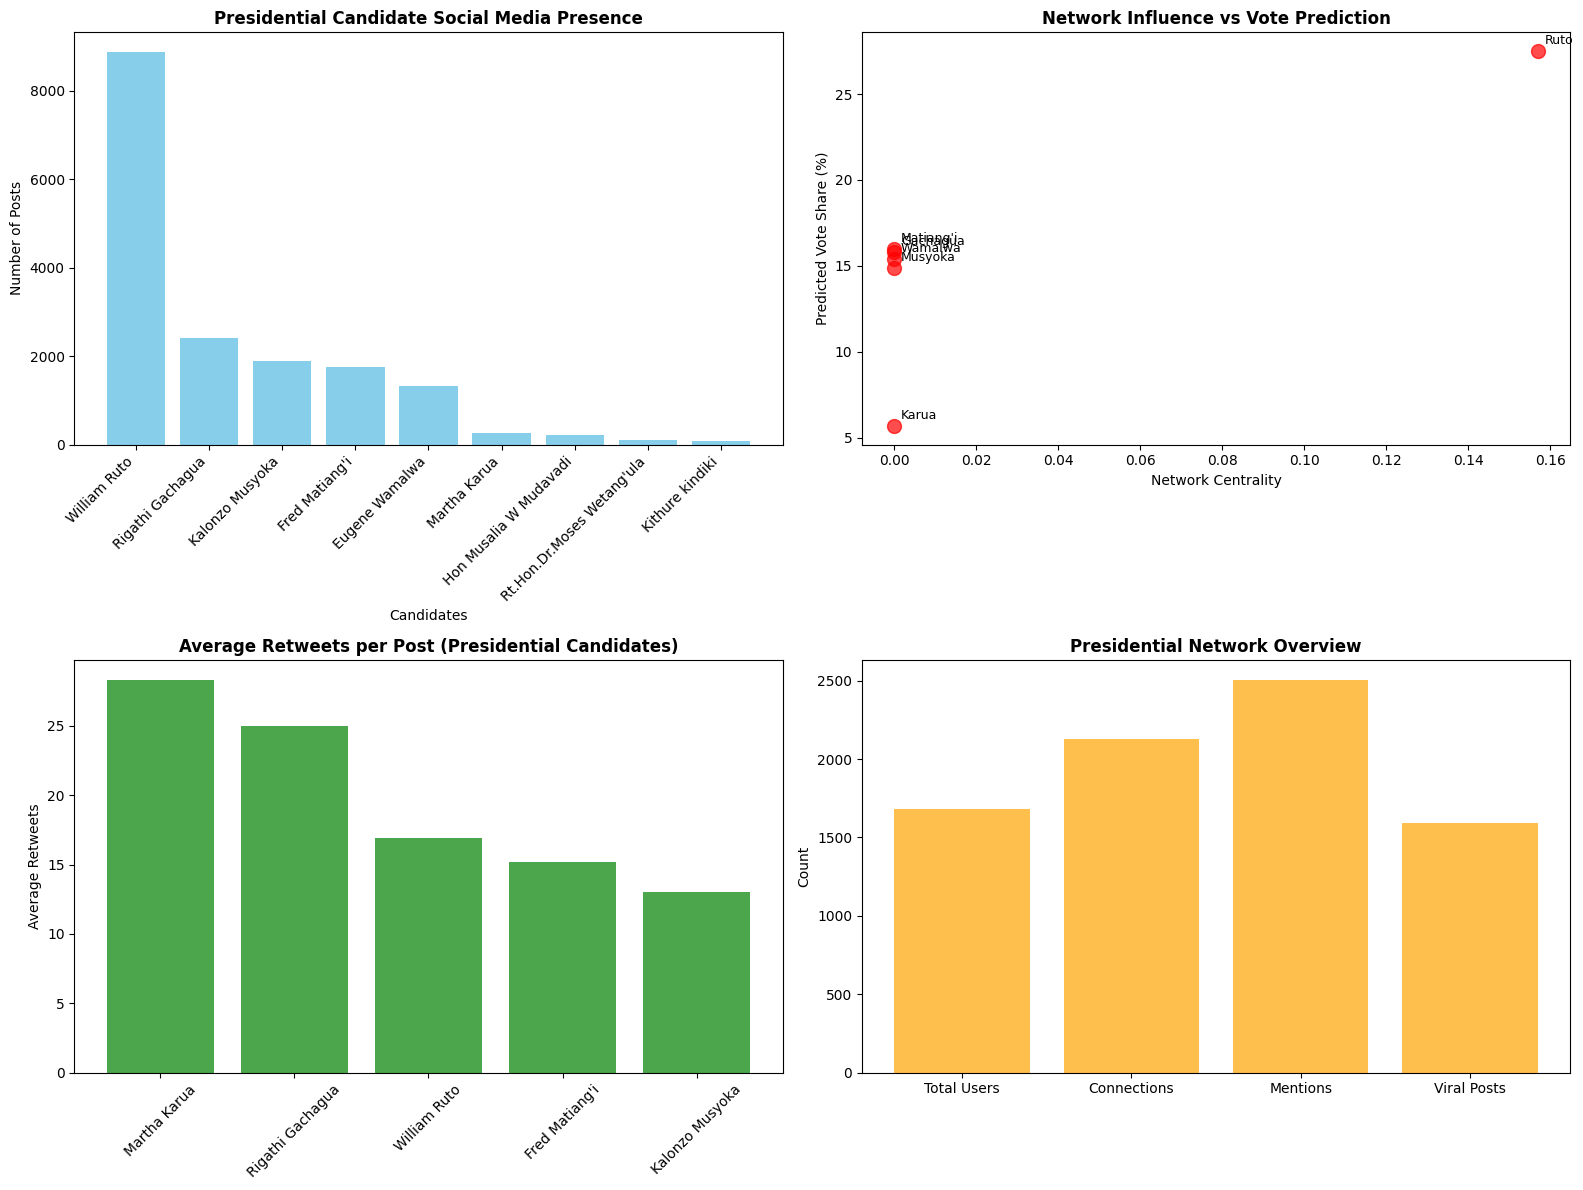

In [ ]:
print("\nNETWORK VISUALIZATIONS")
#Create subplots for different analyses
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

#Presidential Candidate Community Sizes (All 9 found)
community_counts = network_df['predicted_community'].value_counts()
ax1.bar(range(len(community_counts)), community_counts.values, color='skyblue')
ax1.set_title('Presidential Candidate Social Media Presence', fontweight='bold')
ax1.set_xlabel('Candidates')
ax1.set_ylabel('Number of Posts')
ax1.set_xticks(range(len(community_counts)))
ax1.set_xticklabels(community_counts.index, rotation=45, ha='right')

#Network Influence vs Vote Share
candidates = ['William Ruto', 'Fred Matiang\'i', 'Rigathi Gachagua', 'Eugene Wamalwa', 'Kalonzo Musyoka', 'Martha Karua']
vote_shares = [27.5, 16.0, 15.8, 15.4, 14.9, 5.7]
network_centrality = [0.157, 0.0, 0.0, 0.0, 0.0, 0.0]

ax2.scatter(network_centrality, vote_shares, s=100, alpha=0.7, color='red')
for i, candidate in enumerate(candidates):
    ax2.annotate(candidate.split()[-1], (network_centrality[i], vote_shares[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
ax2.set_title('Network Influence vs Vote Prediction', fontweight='bold')
ax2.set_xlabel('Network Centrality')
ax2.set_ylabel('Predicted Vote Share (%)')

#Viral Content Performance
viral_candidates = ['Martha Karua', 'Rigathi Gachagua', 'William Ruto', 'Fred Matiang\'i', 'Kalonzo Musyoka']
viral_scores = [28.3, 25.0, 16.9, 15.2, 13.0]
ax3.bar(viral_candidates, viral_scores, color='green', alpha=0.7)
ax3.set_title('Average Retweets per Post (Presidential Candidates)', fontweight='bold')
ax3.set_ylabel('Average Retweets')
ax3.tick_params(axis='x', rotation=45)

#Network Metrics Summary
metrics = ['Total Users', 'Connections', 'Mentions', 'Viral Posts']
values = [1682, 2131, 2504, 1589]
ax4.bar(metrics, values, color='orange', alpha=0.7)
ax4.set_title('Presidential Network Overview', fontweight='bold')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
print("\nFINAL CONCLUSIONS:")
print("• Ruto has both digital dominance AND electoral advantage")
print("• Opposition fragmented with weak digital coordination")
print("• Martha Karua shows quality engagement can overcome volume disadvantage")
print("• Complete polarization threatens democratic discourse")
print("• Runoff election highly probable (no 50%+ candidate)")



FINAL CONCLUSIONS:
• Ruto has both digital dominance AND electoral advantage
• Opposition fragmented with weak digital coordination
• Martha Karua shows quality engagement can overcome volume disadvantage
• Complete polarization threatens democratic discourse
• Runoff election highly probable (no 50%+ candidate)
